In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

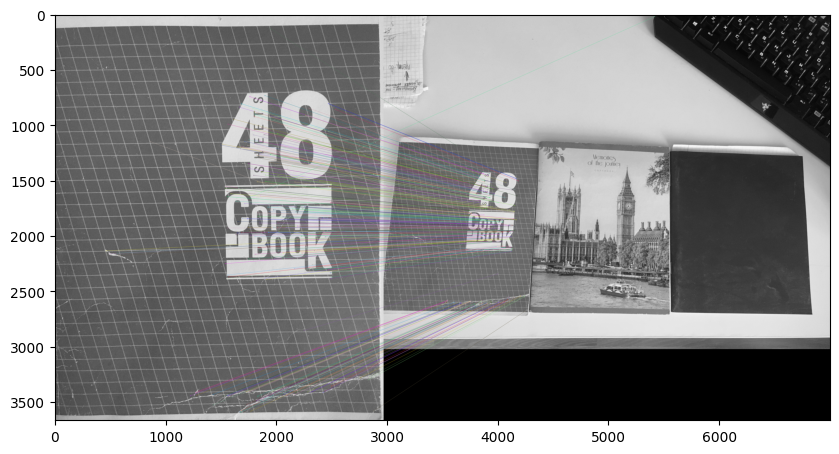

(<matplotlib.image.AxesImage at 0x128bf7cd0>, None)

In [8]:
#1) поиск sift фич на изображениях
img1 = cv.imread('box.jpg',cv.IMREAD_GRAYSCALE)         
img2 = cv.imread('box_in_scene.jpg',cv.IMREAD_GRAYSCALE) 
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
figure(figsize=(10, 8), dpi=100)
plt.imshow(img3),plt.show()

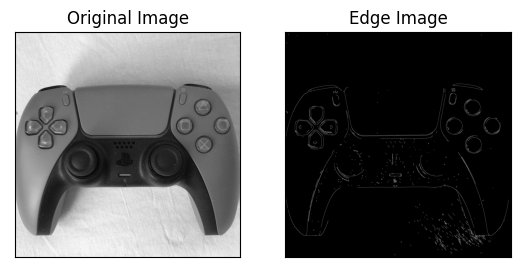

In [12]:
#2,3) поиск canny edges на grayscale изображении
img = cv.imread('canny.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

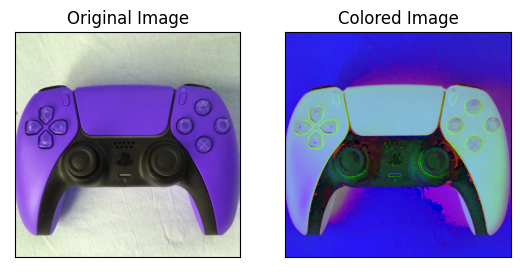

In [40]:
#4) перевод в hsv из rgb
image = cv.imread('canny.jpg')
gray = cv.cvtColor(image, cv.COLOR_RGB2HSV)
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray)
plt.title('Colored Image'), plt.xticks([]), plt.yticks([])
plt.show()

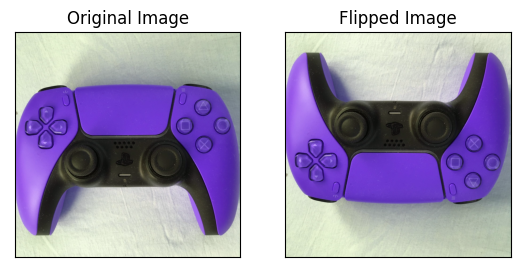

In [18]:
#5) отзеркаливание изображения относительно x
flipped = cv.flip(image,0)#0,-1,1 --axis of flip
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(flipped)
plt.title('Flipped Image'), plt.xticks([]), plt.yticks([])
plt.show()

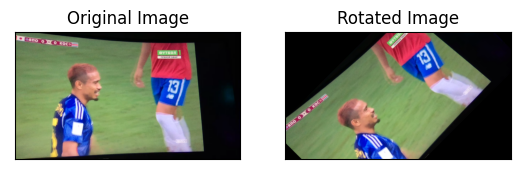

In [16]:
#6) поворот на 45 градусов
cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    frame = cv.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)
    cv.imshow('Input', frame)
    c = cv.waitKey(1)
    if c == 27:
        break
cap.release()
cv.destroyAllWindows()

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
  return result

frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB) 
rotated = rotate_image(frame, 45)
plt.subplot(121),plt.imshow(frame)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(rotated)
plt.title('Rotated Image'), plt.xticks([]), plt.yticks([])
plt.show()

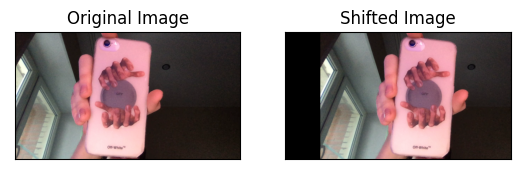

In [50]:
#7) смещение изображения
cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    frame = cv.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)
    cv.imshow('Input', frame)
    c = cv.waitKey(1)
    if c == 27:
        break
cap.release()
cv.destroyAllWindows()
def shift_image(img, offsetx, offsety):
    num_rows, num_cols = img.shape[:2]
    translation_matrix = np.float32([ [1,0,offsetx], [0,1,offsety] ])
    result = cv.warpAffine(img, translation_matrix, (num_cols,num_rows))
    return result
frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB) 
shifted = shift_image(frame, 100, 0)
plt.subplot(121),plt.imshow(frame)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(shifted)
plt.title('Shifted Image'), plt.xticks([]), plt.yticks([])
plt.show()

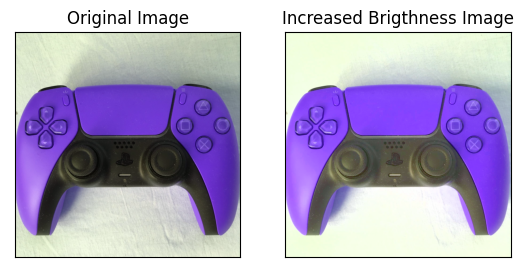

In [21]:
#8) повышение яркости
def increase_brightness(img, value=30):
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    h, s, v = cv.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv.merge((h, s, v))
    img = cv.cvtColor(final_hsv, cv.COLOR_HSV2RGB)
    return img
increased = increase_brightness(image, 50)
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(increased)
plt.title('Increased Brigthness Image'), plt.xticks([]), plt.yticks([])
plt.show()

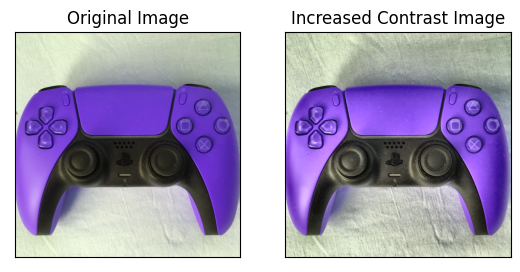

In [24]:
#9) повышение контраста
lab= cv.cvtColor(image, cv.COLOR_RGB2LAB)
l_channel, a, b = cv.split(lab)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)
limg = cv.merge((cl,a,b))
contrasted = cv.cvtColor(limg, cv.COLOR_LAB2RGB)
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(contrasted)
plt.title('Increased Contrast Image'), plt.xticks([]), plt.yticks([])
plt.show()

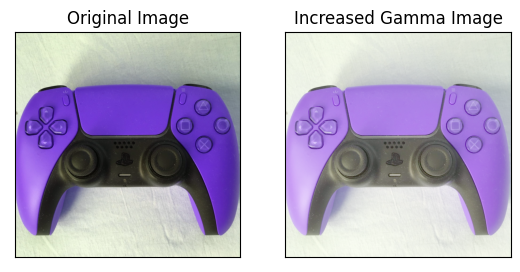

In [25]:
#10) гамма-преобразование
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
    return cv.LUT(src, table)
gammaImg = gammaCorrection(image, 2.2)
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gammaImg)
plt.title('Increased Gamma Image'), plt.xticks([]), plt.yticks([])
plt.show()

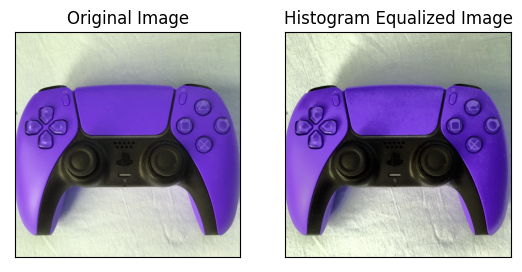

In [26]:
#11) гистограмная эквайлизация
img_yuv = cv.cvtColor(image, cv.COLOR_RGB2YUV)
img_yuv[:,:,0] = cv.equalizeHist(img_yuv[:,:,0])
equ = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(equ)
plt.title('Histogram Equalized Image'), plt.xticks([]), plt.yticks([])
plt.show()

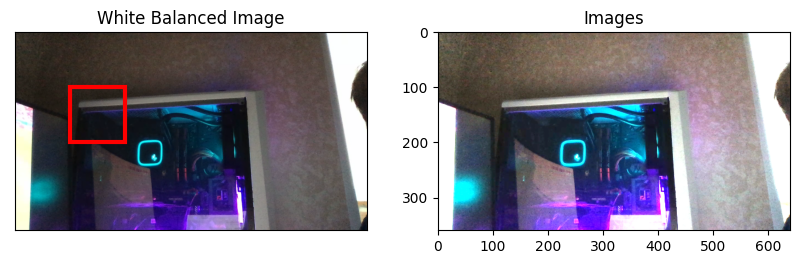

In [18]:
#12) более холодный баланс белого
cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    frame = cv.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)
    cv.imshow('Input', frame)
    c = cv.waitKey(1)
    if c == 27:
        break
cap.release()
cv.destroyAllWindows()

from matplotlib.patches import Rectangle
def whitepatch_balancing(image, from_row, from_column, 
                         row_width, column_width):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].imshow(image)
    ax[0].add_patch(Rectangle((from_column, from_row), 
                              column_width, 
                              row_width, 
                              linewidth=3,
                              edgecolor='r', facecolor='none'));
    ax[0].set_title('Original image')
    image_patch = image[from_row:from_row+row_width, 
                        from_column:from_column+column_width]
    image_max = (image*1.0 / 
                 image_patch.max(axis=(0, 1))).clip(0, 1)
    ax[1].imshow(image_max);
    ax[1].set_title('Images')
    return ax
frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB) 
whiteBalanced = whitepatch_balancing(frame,100, 100, 100, 100)
plt.subplot(121),plt.imshow(frame)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.title('White Balanced Image'), plt.xticks([]), plt.yticks([])
plt.show()

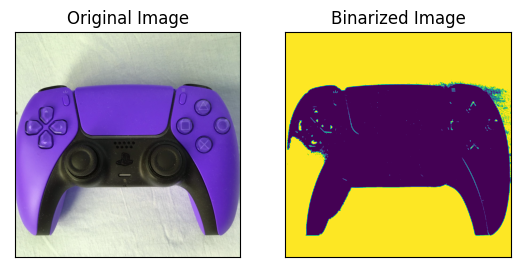

In [47]:
#13) бинаризация изображения

im_gray = cv.imread('canny.jpg', cv.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv.threshold(im_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
thresh = 130
im_bw = cv.threshold(im_gray, thresh, 255, cv.THRESH_BINARY)[1]
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im_bw)
plt.title('Binarized Image'), plt.xticks([]), plt.yticks([])
plt.show()


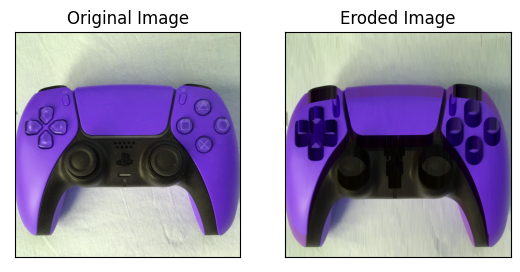

In [79]:
#14) эрозия изображения

erode_img = cv.erode(image, (10,10), iterations=100)
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erode_img)
plt.title('Eroded Image'), plt.xticks([]), plt.yticks([])
plt.show()

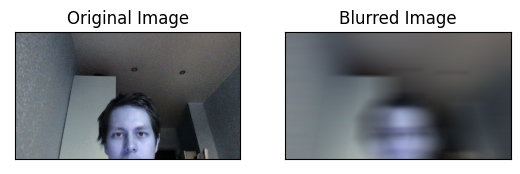

In [7]:
#15) блюр изображения
cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    frame = cv.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)
    cv.imshow('Input', frame)
    c = cv.waitKey(1)
    if c == 27:
        break
cap.release()
cv.destroyAllWindows()

blurred = cv.blur(frame,(100,10))
plt.subplot(121),plt.imshow(frame)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred)
plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])
plt.show()